In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates

In [2]:
stock = pd.read_csv(r'C:\Users\bangy\Desktop\quant\HS300.csv')
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2434 non-null   object 
 1   Open    2434 non-null   float64
 2   Close   2434 non-null   float64
 3   High    2434 non-null   float64
 4   Low     2434 non-null   float64
 5   volume  2434 non-null   int64  
 6   money   2434 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 133.2+ KB


In [3]:
open_price = stock["Open"]
close_price = stock["Close"]
high_price =stock["High"]
low_price = stock["Low"]

In [4]:
high_channel = high_price.rolling(window = 60).max()
low_channel = low_price.rolling(window = 60).min()
mid_channel = (high_channel + low_channel) / 2

high_channel_10 = high_price.rolling(window = 10).max()
low_channel_10 = low_price.rolling(window = 10).min()

C:\Users\bangy\AppData\Local\Temp\ipykernel_38388\4197338388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlc.loc[:,'Date'] = range(len(ohlc))
C:\Users\bangy\AppData\Local\Temp\ipykernel_38388\4197338388.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ohlc.loc[:,'Date'] = range(len(ohlc))


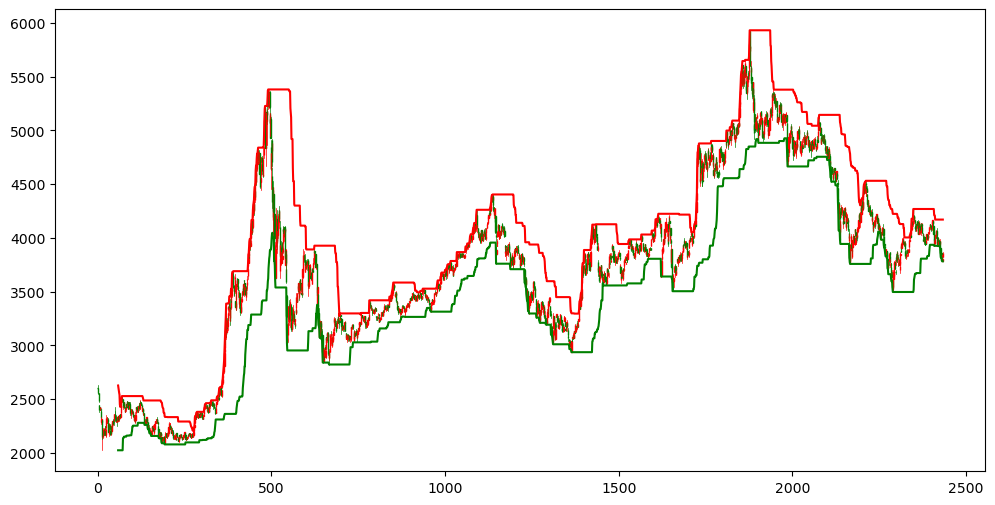

In [5]:
ohlc = stock[['Date', 'Open', 'High', 'Low', 'Close']]
ohlc.loc[:,'Date'] = range(len(ohlc))
f1, ax = plt.subplots(figsize = (12,6))

candlestick_ohlc(ax, ohlc.values.tolist(), width=.7, colorup='red', colordown='green') 
plt.plot(high_channel, 'r', low_channel, 'g')
plt.show()

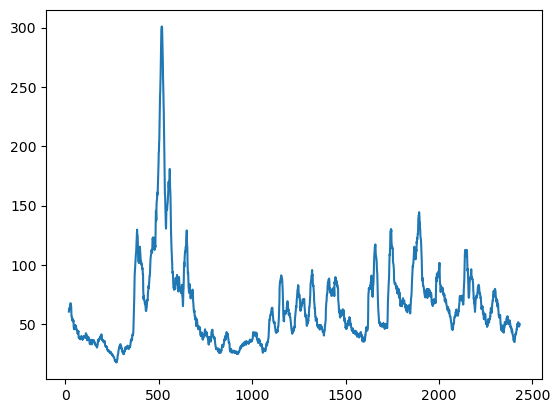

In [6]:
true_range = []
previous_close = close_price[0]
for high, low, close in zip(high_price, low_price, close_price):
    current_range = max(high - low, abs(high - previous_close), abs(previous_close - low))
    true_range.append(current_range)
    previous_close = close

true_range = pd.Series(true_range)
atr = true_range.rolling(window=20).mean() - true_range.rolling(window=1).mean() + true_range
plt.plot(atr)

In [7]:
total_money = 1000000
current_money = total_money

total_long_unit = 0
total_short_unit = 0

long_entry_price = 0
short_entry_price = 0

current_assert = [total_money for _ in range(20)]
long_open_position_day = []
short_open_position_day = []
long_increase_day = []
short_increase_day = []
long_close_position_day = []
short_close_position_day = []

long_atr_fixed = 0
short_atr_fixed = 0


for days in range(19, len(open_price)):
    unit = int(total_money * 0.01 / (100 * atr[days]))

    long_operation = False
    short_operation = False
    
    if long_entry_price > 0 and high_price[days] - 0.5 * long_atr_fixed >= long_entry_price:
        unit = min(unit, int(current_money/(100 * (long_entry_price + 0.5 * long_atr_fixed))))
        current_money = current_money - unit * (long_entry_price + 0.5 * long_atr_fixed) * 100
        total_long_unit = total_long_unit + unit
        long_entry_price = long_entry_price + 0.5 * long_atr_fixed
        if unit > 0:
            long_increase_day.append(days)
            long_operation = True
    '''
    if short_entry_price > 0 and low_price[days] + 0.5 * short_atr_fixed <= short_entry_price:
        unit = min(unit, int(current_money/(100 * (short_entry_price - 0.5 * short_atr_fixed))))
        current_money = current_money + unit * (short_entry_price - 0.5 * short_atr_fixed) * 100
        total_short_unit = total_short_unit + unit
        short_entry_price = short_entry_price - 0.5 * short_atr_fixed
        if unit > 0:
            short_increase_day.append(days)
            short_operation = True
    '''


    if long_entry_price == 0 and high_price[days] >= high_channel[days]:
        unit = min(unit, int(current_money/(100 * high_channel[days])))
        current_money = current_money - unit * high_channel[days] * 100
        total_long_unit = unit
        if unit > 0:
            long_entry_price = high_channel[days]
            long_atr_fixed = atr[days]
            long_open_position_day.append(days)
            long_operation = True
    '''
    if short_entry_price == 0 and low_price[days] <= low_channel[days]:
        unit = min(unit, int(current_money/(100 * low_channel[days])))
        current_money = current_money + unit * low_channel[days] * 100
        total_short_unit = unit
        if unit > 0:
            short_entry_price = low_channel[days]
            short_atr_fixed = atr[days]
            short_open_position_day.append(days)
            short_operation = True
    '''


    '''
    if total_short_unit > 0 and high_price[days] >= high_channel_10[days] and short_operation == False:
        current_money = current_money - total_short_unit * high_channel_10[days] * 100
        total_short_unit = 0
        short_entry_price = 0
        short_close_position_day.append(days)
        
    if total_short_unit > 0 and high_price[days] - 2 * short_atr_fixed >= short_entry_price and short_operation == False:
        current_money = current_money - total_short_unit * (short_entry_price + 2 * short_atr_fixed) * 100
        total_short_unit = 0
        short_entry_price = 0
        short_close_position_day.append(days)
    '''
    if total_long_unit > 0 and low_price[days] <= low_channel_10[days] and long_operation == False:
        current_money = current_money + total_long_unit * low_channel_10[days] * 100
        total_long_unit = 0
        long_entry_price = 0
        long_close_position_day.append(days)

    if total_long_unit > 0 and low_price[days] + 2 * long_atr_fixed <= long_entry_price and long_operation == False:
        current_money = current_money + total_long_unit * (long_entry_price - 2 * long_atr_fixed) * 100
        total_long_unit = 0
        long_entry_price = 0
        long_close_position_day.append(days)
    
    current_assert.append(current_money + (total_long_unit - total_short_unit) * 100 * close_price[days])

final_assert = current_money + (total_long_unit - total_short_unit) * 100 * close_price[len(close_price)-1]

print(final_assert)

1585508.7000000014


In [8]:
print(long_open_position_day)
print(short_open_position_day)
print(short_close_position_day)

[67, 277, 306, 322, 343, 359, 432, 624, 697, 759, 782, 839, 928, 935, 976, 987, 1006, 1033, 1059, 1063, 1080, 1089, 1128, 1385, 1420, 1434, 1528, 1564, 1595, 1604, 1709, 1717, 1766, 1810, 1820, 1825, 1847, 2075, 2197, 2338]
[]
[]


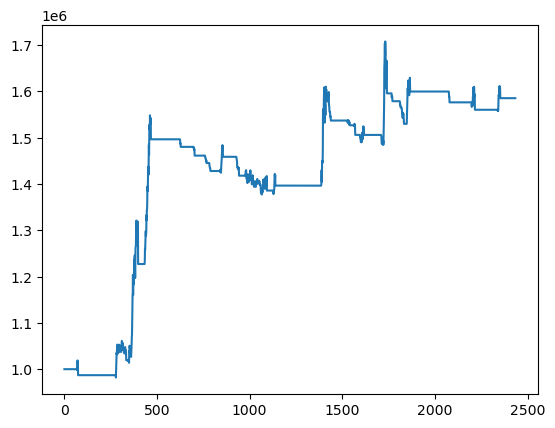

In [9]:
plt.plot(current_assert)

plt.show()

In [10]:
max_dawndown = 0
for i in range(len(current_assert)):
    for j in range(i+1, len(current_assert)):
        if current_assert[i] > current_assert[j]:
            max_dawndown = max(max_dawndown, (current_assert[i] - current_assert[j]) / current_assert[i])

print(max_dawndown)

0.11051486913706575


In [11]:
start_date = datetime(2013, 6, 3)
end_date = datetime(2023, 6, 2)

num_days = (end_date - start_date).days

print("Number of days:", num_days)

Number of days: 3651


In [12]:
print("Origin: Annualized rate of return:", (close_price[len(close_price)-1]/ open_price[0] - 1) / num_days * 365)

Origin: Annualized rate of return: 0.04817845266858005


In [13]:
print("Strategy: Rate of return:", (final_assert / total_money - 1))
print("Strategy: Annualized rate of return:", (final_assert / total_money - 1) / num_days * 365)

Strategy: Rate of return: 0.5855087000000014
Strategy: Annualized rate of return: 0.058534833059435916
